<a href="https://colab.research.google.com/github/RIyadhaque492/Rangpur_Team_Recursion/blob/main/AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import  pandas as pd
df = pd.read_csv("/content/drive/MyDrive/dsc_fc_summed_spectra_2021_v01.csv", \
delimiter = ',', parse_dates=[0], \
infer_datetime_format=True, na_values='0', \
header = None)

In [2]:
datetime_col = df.iloc[:, 0]
imf_cols = df.iloc[:, 1:4]
spectra_cols = df.iloc[:, 4:]


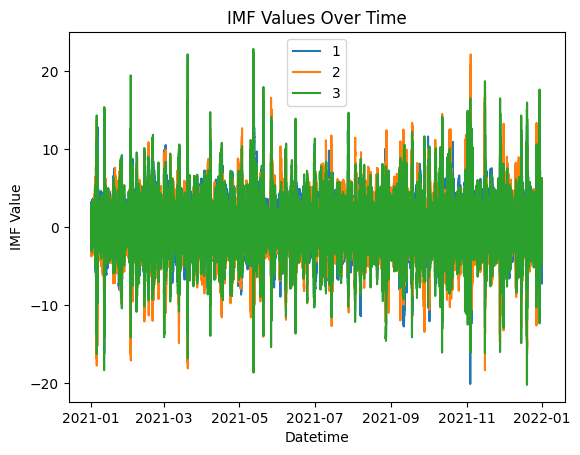

In [3]:
import matplotlib.pyplot as plt

for col in imf_cols.columns:
    plt.plot(datetime_col, imf_cols[col], label=col)

plt.xlabel('Datetime')
plt.ylabel('IMF Value')
plt.legend()
plt.title('IMF Values Over Time')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


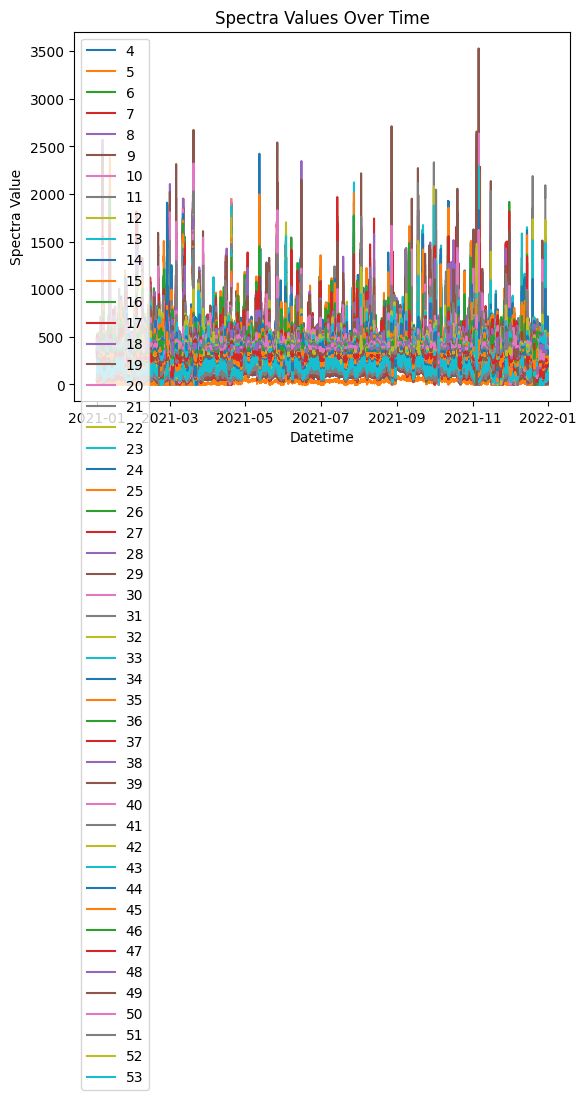

In [4]:
for col in spectra_cols.columns:
    plt.plot(datetime_col, spectra_cols[col], label=col)

plt.xlabel('Datetime')
plt.ylabel('Spectra Value')
plt.legend()
plt.title('Spectra Values Over Time')
plt.show()


In [5]:
missing_values = df.isna()


In [6]:
missing_count = df.isna().sum()
print(missing_count)


0          0
1       1484
2       1484
3       1484
4      15277
5      15275
6      15270
7      15263
8      15262
9      15262
10     15260
11     15258
12     16750
13     16763
14     16768
15     16768
16     16767
17     16771
18     16776
19     16910
20     18139
21     22710
22     35951
23     59306
24     74067
25    119372
26    142792
27    181207
28    204279
29    248109
30    274358
31    320163
32    328976
33    374995
34    380345
35    395622
36    426708
37    442282
38    449503
39    471348
40    474101
41    496351
42    499688
43    507225
44    515243
45    520149
46    521847
47    524487
48    524700
49    525428
50    525449
51    525498
52    525502
53    525530
dtype: int64


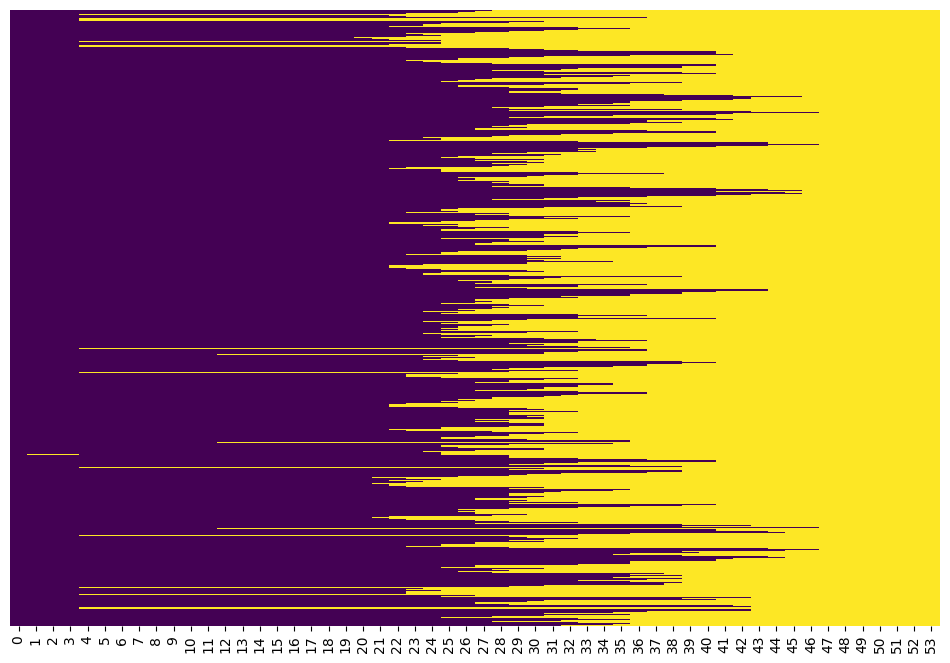

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cmap="viridis", cbar=False, yticklabels=False)
plt.show()


In [8]:
missing_values_per_row = df.isna().sum(axis=1)


In [9]:
rows_with_missing = df[missing_values_per_row > 0]
print(rows_with_missing)


                        0         1        2        3        4         5   \
0      2021-01-01 00:00:00 -0.948315 -1.29987  2.52648  35.6484  0.231726   
1      2021-01-01 00:01:00 -1.078140 -1.55924  2.29992  35.7236  0.231726   
2      2021-01-01 00:02:00 -1.050860 -1.58057  2.29622  35.5839  0.231726   
3      2021-01-01 00:03:00 -1.264670 -1.62778  2.10860  35.4769  0.231726   
4      2021-01-01 00:04:00 -1.373980 -1.62493  2.10137  35.5176  0.231726   
...                    ...       ...      ...      ...      ...       ...   
525595 2021-12-31 23:55:00 -6.388350  1.82727 -4.02363  38.0669  0.231726   
525596 2021-12-31 23:56:00 -6.518190  2.16723 -3.57759  37.4031  0.231726   
525597 2021-12-31 23:57:00 -6.420670  1.76064 -4.10339  38.3415  0.231726   
525598 2021-12-31 23:58:00 -6.298650  1.19849 -4.63329  38.2767  0.239451   
525599 2021-12-31 23:59:00 -6.217850  1.27989 -4.73844  38.9057  0.231726   

             6        7        8        9   ...  44  45  46  47  48  49  50

In [10]:
rows_with_missing = df[missing_values_per_row > 0]
print(rows_with_missing)


                        0         1        2        3        4         5   \
0      2021-01-01 00:00:00 -0.948315 -1.29987  2.52648  35.6484  0.231726   
1      2021-01-01 00:01:00 -1.078140 -1.55924  2.29992  35.7236  0.231726   
2      2021-01-01 00:02:00 -1.050860 -1.58057  2.29622  35.5839  0.231726   
3      2021-01-01 00:03:00 -1.264670 -1.62778  2.10860  35.4769  0.231726   
4      2021-01-01 00:04:00 -1.373980 -1.62493  2.10137  35.5176  0.231726   
...                    ...       ...      ...      ...      ...       ...   
525595 2021-12-31 23:55:00 -6.388350  1.82727 -4.02363  38.0669  0.231726   
525596 2021-12-31 23:56:00 -6.518190  2.16723 -3.57759  37.4031  0.231726   
525597 2021-12-31 23:57:00 -6.420670  1.76064 -4.10339  38.3415  0.231726   
525598 2021-12-31 23:58:00 -6.298650  1.19849 -4.63329  38.2767  0.239451   
525599 2021-12-31 23:59:00 -6.217850  1.27989 -4.73844  38.9057  0.231726   

             6        7        8        9   ...  44  45  46  47  48  49  50

In [11]:
missing_counts_in_rows = missing_values_per_row[missing_values_per_row > 0]
print(missing_counts_in_rows)


0         25
1         25
2         25
3         25
4         25
          ..
525595    24
525596    24
525597    24
525598    24
525599    24
Length: 525530, dtype: int64


In [12]:
all_missing_rows = df[df.isna().all(axis=1)]
print(all_missing_rows)


Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
Index: []

[0 rows x 54 columns]
